In [70]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [40]:
#TAST 3/4: 

# The following describes the dataset variables:

# ·      CRIM - per capita crime rate by town

# ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

# ·      INDUS - proportion of non-retail business acres per town.

# ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# ·      NOX - nitric oxides concentration (parts per 10 million)

# ·      RM - average number of rooms per dwelling

# ·      AGE - proportion of owner-occupied units built prior to 1940

# ·      DIS - weighted distances to five Boston employment centres

# ·      RAD - index of accessibility to radial highways

# ·      TAX - full-value property-tax rate per $10,000

# ·      PTRATIO - pupil-teacher ratio by town

# ·      LSTAT - % lower status of the population

# ·      MEDV - Median value of owner-occupied homes in $1000's

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df[:6]

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7


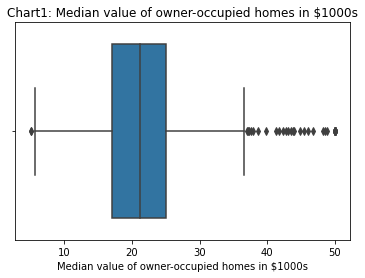

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [107]:


#     For the "Median value of owner-occupied homes" provide a boxplot

#     Provide a  bar plot for the Charles river variable

#     Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#     Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

#     Create a histogram for the pupil to teacher ratio variable



#For the "Median value of owner-occupied homes" provide a boxplot#
############### finding on chart ######################
#### the mean is around 22, 25% is around 17 and 75% is around 25

ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title('Chart1: Median value of owner-occupied homes in $1000s')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.show()

print(boston_df['MEDV'].describe())



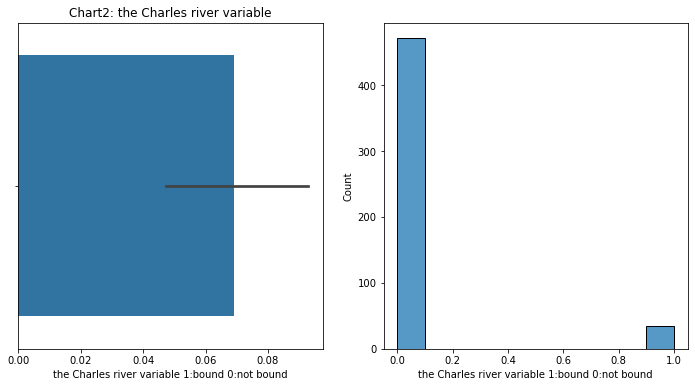

In [105]:
#     Provide a  bar plot for the Charles river variable
############### finding on chart ######################
######   most samples do not bound to river.

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1,2, 1)
sns.barplot(x="CHAS", data=boston_df)
plt.title('Chart2: the Charles river variable')
plt.xlabel('the Charles river variable 1:bound 0:not bound')
plt.subplot(1,2, 2)
sns.histplot(x="CHAS", data=boston_df)
plt.xlabel('the Charles river variable 1:bound 0:not bound')

plt.show()


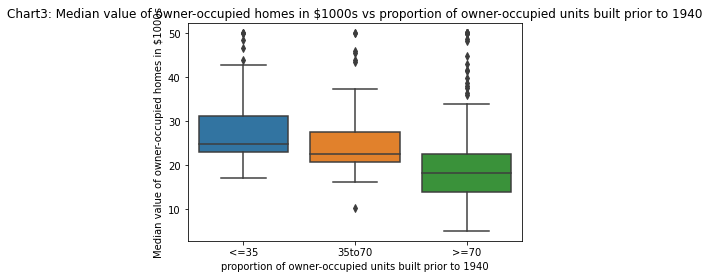

In [109]:
#     Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
############### finding on chart ######################
#### Higher the AGE, lower the Median value of owner-occupied homes

def newAge(x):
    if x <=35:
        return 0
    if x >=70:
        return 2
    else:
        return 1
boston_df['AGE_group'] = boston_df['AGE'].apply(lambda x: newAge(x) )
sns.boxplot(x='AGE_group',y='MEDV', data=boston_df)
plt.xticks([0,1,2], ['<=35', '35to70', '>=70'])
plt.xlabel('proportion of owner-occupied units built prior to 1940')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Chart3: Median value of owner-occupied homes in $1000s vs proportion of owner-occupied units built prior to 1940')
plt.show()

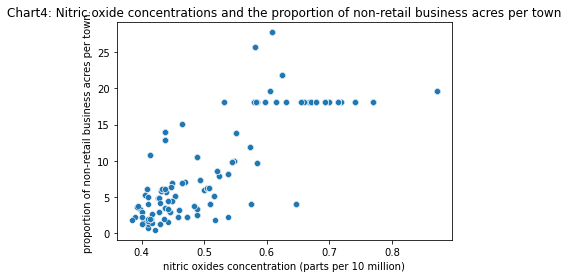

In [110]:
#     Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
############### finding on chart ######################
### Looks like ther has some kind of relationship between this two items.
sns.scatterplot(x='NOX',y='INDUS', data=boston_df)


plt.title('Chart4: Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel(r'nitric oxides concentration (parts per 10 million)')
plt.ylabel('proportion of non-retail business acres per town.')
plt.show()


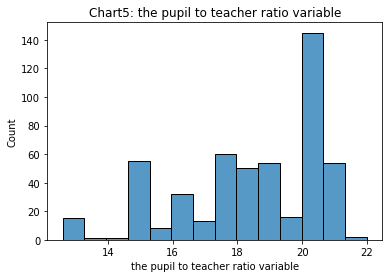

In [111]:
#     Create a histogram for the pupil to teacher ratio variable
############### finding on chart ######################
###  the mode value is around 20
sns.histplot(x='PTRATIO',data=boston_df)
plt.title('Chart5: the pupil to teacher ratio variable')
plt.xlabel('the pupil to teacher ratio variable')
plt.show()


In [71]:
# Task 5: Use the appropriate tests to answer the questions provided.

# For each of the following questions;

#     Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#     Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#     Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#     What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Be sure to:

#     State your hypothesis.

#     Use α = 0.05

#     Perform the test Statistics.

#     State the conclusion from the test.

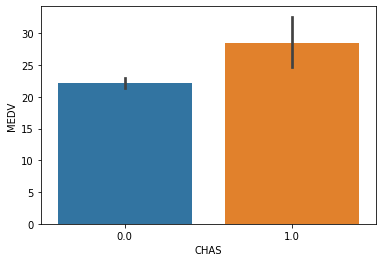

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [83]:
#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#### 
##state the hypothesis 
## null hypothesis  u1 = u2  there is no difference in MEDV for Charles river or not
## alternative hypothesis: u1 != u2  there is difference in MEDV between charles river and non charles river.
### alpha = 0.05
import scipy.stats
X0 = boston_df[(boston_df.CHAS == 0)]['MEDV']
X1 = boston_df[(boston_df.CHAS == 1)]['MEDV']

scipy.stats.ttest_ind(X0,X1)
## conclusion ###
## because Pvalue < 0.05, reject the null hypothesis as there is enough evidence that there is a statistical difference 
## in median value of houses bounded by the charles river


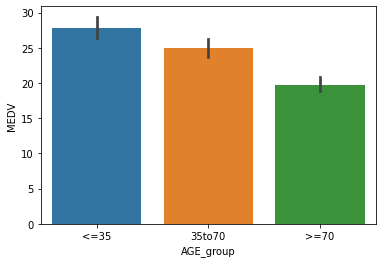

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [91]:
sns.barplot(x="AGE_group", y = 'MEDV',data=boston_df)
plt.xticks([0,1,2], ['<=35', '35to70', '>=70'])
plt.show()
#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##state the hypothesis 
## null hypothesis  samples in all group with same mean value
## alternative hypothesis: at least one of the mean is different..
### alpha = 0.05
X0 = boston_df[(boston_df.AGE_group == 0)]['MEDV']
X1 = boston_df[(boston_df.AGE_group == 1)]['MEDV']
X2 = boston_df[(boston_df.AGE_group == 2)]['MEDV']
scipy.stats.f_oneway(X0,X1,X2)
## conclusion ###
## because Pvalue < 0.05, reject the null hypothesis as there is enough evidence that there is a statistical difference 
## at least one of the mean  is different for each proportion of owner occupied units built prior to 1940 (AGE)

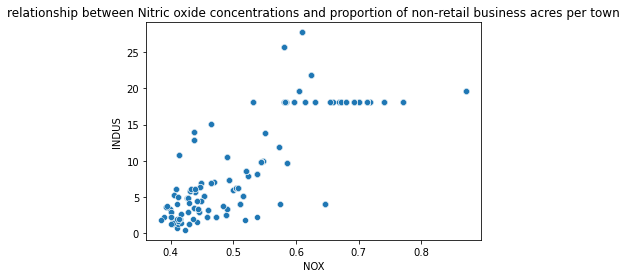

(0.7636514469209151, 7.913361061238693e-98)

In [113]:
sns.scatterplot(x="NOX", y = 'INDUS',data=boston_df)
plt.title('relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
plt.show()
#     Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##state the hypothesis 
## null hypothesis: no relationship between 'NOX' and 'INDUS'
## alternative hypothesis: there is relationship between 'NOX' and 'INDUS'

scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

## conclusion ###
## P < 0.05, there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

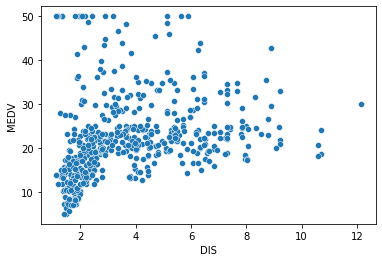

result by Pearsonr  0.2499287340859039 1.2066117273368017e-08
result by regression


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        00:25:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#     What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

##state the hypothesis 
## null hypothesis: no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
## alternative hypothesis: there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

sns.scatterplot(x="DIS", y = 'MEDV',data=boston_df)
plt.show()
score,p = scipy.stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])
print("result by Pearsonr ",score,p)
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
print("result by regression")
model.summary()
## conclusion ###
## when the additional distance increase, the median value of owner occupied homes is somehow increase.